                                         TITANIC EXCERCISE 

                                      Preeti Lakhole - 4.21.2016

 ### DATA EXPLORATION AND CLEANING

In [2]:
#import libraries

import csv as csv
import numpy as np
import pandas as pd
from patsy import dmatrices
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm

In [3]:
#Read data from the csv file

titanic_full = pd.read_csv("titanic_full.csv")

In [4]:
#create column passenger ID

titanic_full['passengerID'] = titanic_full.index + 1

In [5]:
#Assign value z9 to boat where passengers have survived and boat details have not been recorded
#Assign value 0 to boat where passengers have died and boat details have not been recorded


cond = (pd.isnull(titanic_full['boat']) & (titanic_full['survived'] == 1))
titanic_full.loc[cond, 'boat'] = 'z9'

cond = (pd.isnull(titanic_full['boat']) & (titanic_full['survived'] == 0))
titanic_full.loc[cond, 'boat'] = '0'

In [6]:
titanic_full.head(5)

,survived,name,sex,age,sibsp,parch,pclass,ticket,fare,cabin,embarked,boat,body,home.dest,passengerID
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,1,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,1,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",2
2,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,1,113781,151.5500,C22 C26,S,0,NaN,"Montreal, PQ / Chesterville, ON",3
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,1,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON",4
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,1,113781,151.5500,C22 C26,S,0,NaN,"Montreal, PQ / Chesterville, ON",5


In [7]:
titanic_full.isnull().values.any()

True

### Cleaning the data:

1) Dropped NANs for age & embarked
2) grouped pclass according to the fare, and assigned the NAN, the median value of fare as per the pclass



In [8]:
titanic_full.dropna(subset=['age'], inplace = True)
titanic_full.dropna(subset=['embarked'], inplace = True)

In [10]:
#median fare
median_fare= titanic_full.groupby('pclass')['fare'].median()
titanic_full['faremedian'] = median_fare.loc[titanic_full['pclass'].values].values
titanic_full['fare'].fillna(titanic_full['faremedian'], inplace = True)
#titanic_full['age'].dropna(inplace = True)
del titanic_full['faremedian']
titanic_full=titanic_full.drop(['name','ticket','cabin','body','home.dest'], axis=1)
titanic_full.describe()


,survived,age,sibsp,parch,pclass,fare,passengerID
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,0.407088,29.842593,0.503831,0.421456,2.209770,36.575674,600.931034
std,0.491527,14.390746,0.912775,0.840353,0.840639,55.733920,364.631361
min,0.000000,0.166700,0.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,21.000000,0.000000,0.000000,1.000000,8.050000,300.750000
50%,0.000000,28.000000,0.000000,0.000000,2.000000,15.745850,576.500000
75%,1.000000,39.000000,1.000000,1.000000,3.000000,34.865650,876.500000
max,1.000000,80.000000,8.000000,6.000000,3.000000,512.329200,1309.000000


In [11]:
### Have we gotten rid of all the NAN values?

titanic_full.isnull().values.any()


False

### Yes! Let's proceed to visualization

## DATA VISUALIZATION

In [12]:
titanic_full.head()

,survived,sex,age,sibsp,parch,pclass,fare,embarked,boat,passengerID
0,1,female,29.0000,0,0,1,211.3375,S,2,1
1,1,male,0.9167,1,2,1,151.5500,S,11,2
2,0,female,2.0000,1,2,1,151.5500,S,0,3
3,0,male,30.0000,1,2,1,151.5500,S,0,4
4,0,female,25.0000,1,2,1,151.5500,S,0,5


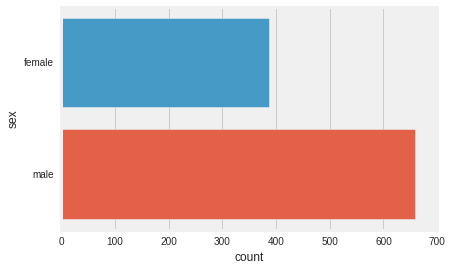

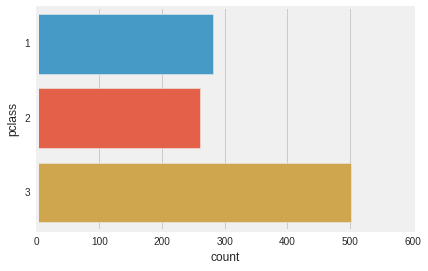

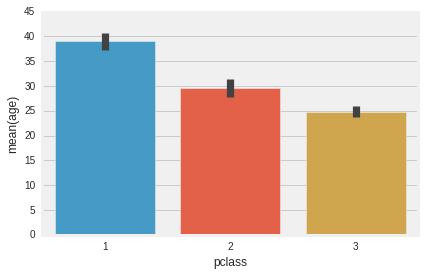

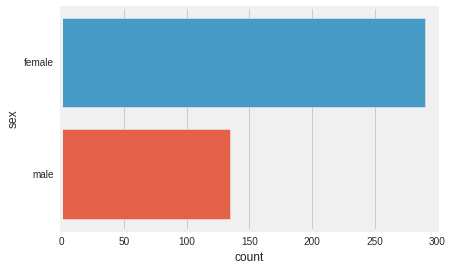

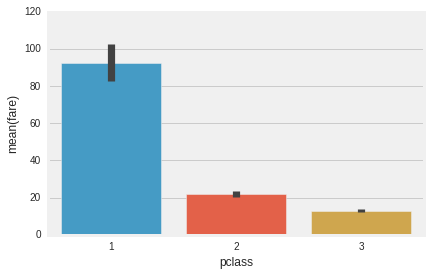

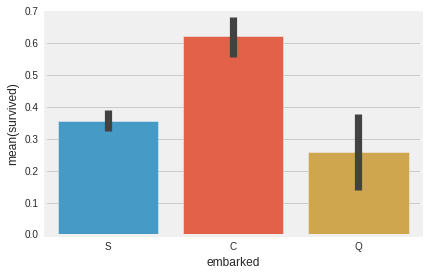

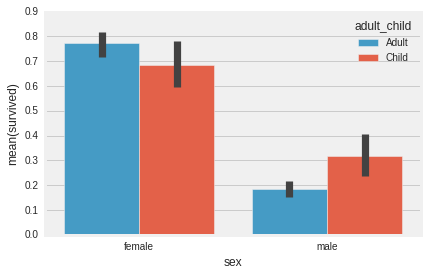

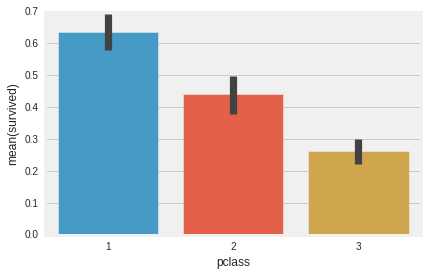

In [16]:
# count based on gender
sns.countplot(y="sex", data = titanic_full)
plt.show()

# count based on class
sns.countplot(y="pclass", data = titanic_full)
plt.show()

# median age based on class
sns.barplot(x="pclass", y="age", data = titanic_full)
plt.show()

# number of survivors based on sex
sns.countplot(y="sex", data = titanic_full[titanic_full['survived'] == 1])
plt.show()

#fare based on class
sns.barplot(x="pclass", y="fare", data = titanic_full)
plt.show()

#number of survivors based on port of embarkation
sns.barplot(x="embarked", y="survived", data = titanic_full)
plt.show()

#number of survivors based on age range - Adult or child
titanic_full['adult_child'] = np.where(titanic_full['age'] > 18, "Adult", "Child")
#adult = titanic_full['age'] > 18
#child = titanic_full['age'] < 18
sns.barplot(x="sex", y="survived", hue="adult_child", data = titanic_full)
plt.show()

#number of surviros based on class
sns.barplot(x="pclass", y="survived", data = titanic_full)
plt.show()

In [105]:
#stats plot by family size
women_stats = titanic_full['sex'].value_counts()["female"]
men_stats = titanic_full['sex'].value_counts()["male"]
print women_stats
print men_stats

386
658


## DATA MODELLING ( FITTING & PREDICTION)

In [23]:
#convert object datatypes to numeric
titanic_full.dtypes

survived          int64
sex            category
age             float64
sibsp             int64
parch             int64
pclass            int64
fare            float64
embarked         object
boat             object
passengerID       int64
adult_child      object
dtype: object

In [24]:
## convert gender and embarked into numeric values
## 1="Female"
## 2="Male"
## 'Q': 2, 'C': 1, 'S': 3

sex_num = sorted(titanic_full['sex'].unique())
genders_mapping = dict(zip(sex_num, range(1, len(sex_num) + 1)))
genders_mapping

titanic_full['sex'] = titanic_full['sex'].map(genders_mapping).astype(int)

embarked_num = sorted(titanic_full['embarked'].unique())
embarked_mapping = dict(zip(embarked_num, range(1, len(embarked_num) + 1)))
embarked_mapping

titanic_full['embarked'] = titanic_full['embarked'].map(embarked_mapping).astype(int)

boat_num = sorted(titanic_full['boat'].unique())
boat_mapping = dict(zip(boat_num, range(1, len(boat_num) + 1)))
boat_mapping

titanic_full['boat'] = titanic_full['boat'].map(boat_mapping).astype(int)


titanic_full.head()

#embarked_num = sorted(titanic_full['embarked'].unique())

#embarked_mapping = dict(zip(embarked_num,range(1, len(embarked_num) + 1)))

#embarked_mapping

#titanic_full['embarked'] = titanic_full['embarked'].map(embarked_mapping).astype(int)
#titanic_full.head()

,survived,sex,age,sibsp,parch,pclass,fare,embarked,boat,passengerID,adult_child
0,1,1,29.0000,0,0,1,211.3375,3,12,1,Adult
1,1,2,0.9167,1,2,1,151.5500,3,4,2,Child
2,0,1,2.0000,1,2,1,151.5500,3,1,3,Child
3,0,2,30.0000,1,2,1,151.5500,3,1,4,Adult
4,0,1,25.0000,1,2,1,151.5500,3,1,5,Adult


In [25]:
print(genders_mapping)
print(embarked_mapping)
print(boat_mapping)

{'male': 2, 'female': 1}
{'Q': 2, 'C': 1, 'S': 3}
{'5 9': 17, '5 7': 16, '8 10': 21, '1': 2, '0': 1, '3': 13, '2': 12, '5': 15, '4': 14, '7': 19, '6': 18, '9': 22, '8': 20, 'A': 23, 'C': 25, 'B': 24, 'D': 27, '13 15': 7, 'z9': 28, '11': 4, '10': 3, '13': 6, '12': 5, '15': 10, '14': 9, '16': 11, '13 15 B': 8, 'C D': 26}


In [26]:
## splitting data into train and test
from sklearn.cross_validation import train_test_split
titanic_train, titanic_test = train_test_split(titanic_full, test_size = 0.3)
print "Rows for training:", titanic_train.count()
print "Rows for testing:", titanic_test.count()

Rows for training: survived       730
sex            730
age            730
sibsp          730
parch          730
pclass         730
fare           730
embarked       730
boat           730
passengerID    730
adult_child    730
dtype: int64
Rows for testing: survived       314
sex            314
age            314
sibsp          314
parch          314
pclass         314
fare           314
embarked       314
boat           314
passengerID    314
adult_child    314
dtype: int64


In [27]:
#Prepare X and Y training values for all models
X_train = titanic_train.drop(['survived', 'boat','passengerID','adult_child'], axis=1)
Y_train = titanic_train['survived']

#Prepare X and Y test values for all models
X_test = titanic_test.drop(['survived', 'boat', 'passengerID','adult_child'], axis=1)
Y_test = titanic_test['survived']


In [29]:
## Random forest

#Creating random forest object

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)


In [30]:
#fit the training data and create decision trees

# Fit the model to our training data
clf = clf.fit(X_train.values, Y_train.values)
score = clf.score(X_train.values, Y_train.values)
"Mean accuracy of Random Forest: {0}".format(score)

'Mean accuracy of Random Forest: 0.968493150685'

In [31]:
 feature_importance =clf.feature_importances_

In [32]:
#Random Forest: predicting

#titanic_test_array = titanic_test.values
#titanic_test_array

#Predict the Survival values for the test data
test_y = clf.predict(X_test.values)

In [33]:
titanic_test['Survived_test'] = test_y
titanic_test[['passengerID', 'Survived_test']] \
    .to_csv('/home/plakhole001/Documents/results-randomforest.csv', index=False)

/home/plakhole001/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


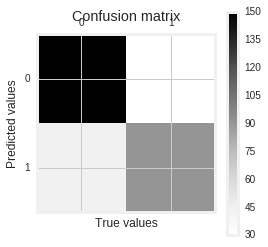

[[150  30]
 [ 44  90]]


In [34]:
#Confusion matrix to evaluate the Random Forest model
forest_cm = confusion_matrix(Y_test, test_y)

plt.matshow(forest_cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Predicted values')
plt.xlabel('True values')
plt.show()
print forest_cm

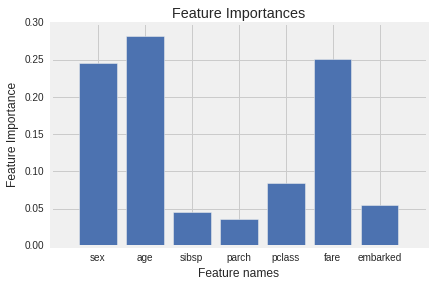

In [35]:
# Plot the feature importances of the forest

plt.figure()
plt.title("Feature Importances")
plt.bar(range(len(feature_importance)), feature_importance, width = 0.8, align="center")
plt.xticks(range(len(feature_importance)), X_train.columns)
plt.xlabel('Feature names')
plt.ylabel('Feature Importance')

plt.show()

In [ ]:
## End of Random forest through sklearn

In [ ]:
## starting logistic regression 

In [36]:
#Logistic Regression

from sklearn import linear_model
from sklearn import preprocessing

In [37]:
lm = linear_model.LogisticRegression(max_iter =1e6)
lm.fit(X_train.values, Y_train.values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000000.0, multi_class='ovr',
          n_jobs=1, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
lm.score(X_train.values, Y_train.values)

0.79589041095890412

In [39]:
lm_predict=lm.predict(X_test.values)

In [40]:
lm_results = accuracy_score(Y_test, lm_predict)
print "Results: %.2f%%" % round(lm_results*100,2)

Results: 79.62%


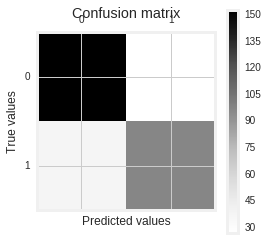

[[153  27]
 [ 37  97]]


In [41]:
#Confusion matrix to evaluate the logit model
lm_cm = confusion_matrix(Y_test, lm_predict)

plt.matshow(lm_cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.show()
print lm_cm

In [ ]:
#support vector machines

In [42]:
from sklearn import svm
X = [X_train.values]
y = [Y_train.values]
clf = svm.SVC()
clf.fit(X, y) 

ValueError: Found array with dim 3. Estimator expected <= 2.

In [43]:
print "Model Comparison:"
print "Random Forest: {}".format(round(np.trace(forest_cm)*100/len(X_test),2))
print "Logistic Regression: {}".format(round(np.trace(lm_cm)*100/len(X_test),2))

Model Comparison:
Random Forest: 76.0
Logistic Regression: 79.0
